## Data Exploration and Preprocessing:

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps

In [2]:
data = pd.read_csv("adult_with_headers.csv")
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Summary statistics
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Handle missing values

In [5]:
# Missing values
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [6]:
# Data types
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


## Apply scaling techniques to numerical features:
##  Standard Scaling:

In [7]:
df = data.copy()
scaler = StandardScaler()
df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])

## Encoding Techniques:

#### Apply One-Hot Encoding to categorical variables with less than 5 categories:

In [8]:
# One-Hot Encoding for categorical variables with less than 5 categories
one_hot_cols = [col for col in df.columns if df[col].nunique() < 5 and df[col].dtype == 'object']
df = pd.get_dummies(df, columns=one_hot_cols)

#### Use Label Encoding for categorical variables with more than 5 categories:

In [9]:
# Label Encoding for categorical variables with more than 5 categories
label_cols = [col for col in df.columns if df[col].nunique() >= 5 and df[col].dtype == 'object']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

## Feature Engineering:
#### Create at least 2 new features:

In [10]:
# Create new features
df['total_income'] = df['capital_gain'] + df['capital_loss']
df['education_years'] = df['age'] * df['education_num']

####  Apply a transformation (e.g., log transformation) to at least one skewed numerical feature:

In [11]:
# Apply log transformation to skewed numerical feature
df['capital_gain'] = np.log(df['capital_gain'] + 1)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,total_income,education_years
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,0.138416,-0.21666,-0.035429,39,0,1,1,0,-0.068207,0.034803
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,-0.157731,-0.21666,-2.222153,39,0,1,1,0,-0.362580,0.949900
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,-0.157731,-0.21666,-0.035429,39,0,1,1,0,-0.362580,0.017912
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,-0.157731,-0.21666,-0.035429,39,0,1,1,0,-0.362580,-1.265770
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,-0.157731,-0.21666,-0.035429,5,1,0,1,0,-0.362580,-0.880294


## Feature Selection:
####  Use the Isolation Forest algorithm to identify and remove outliers:

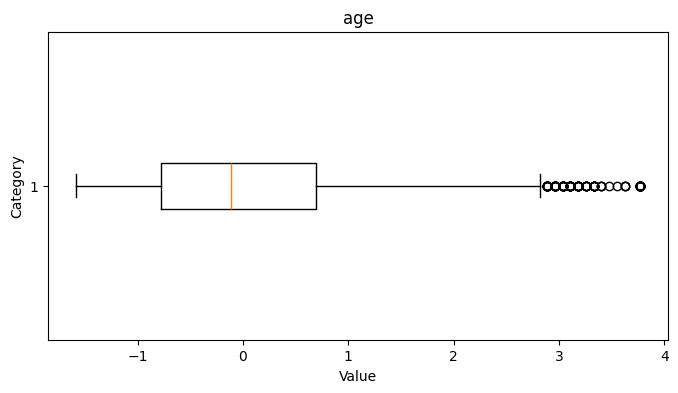

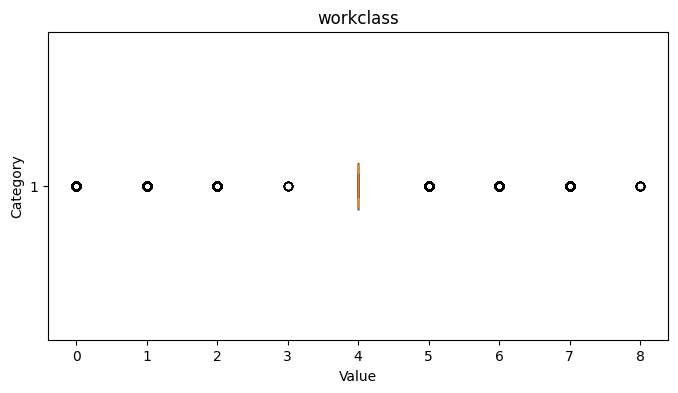

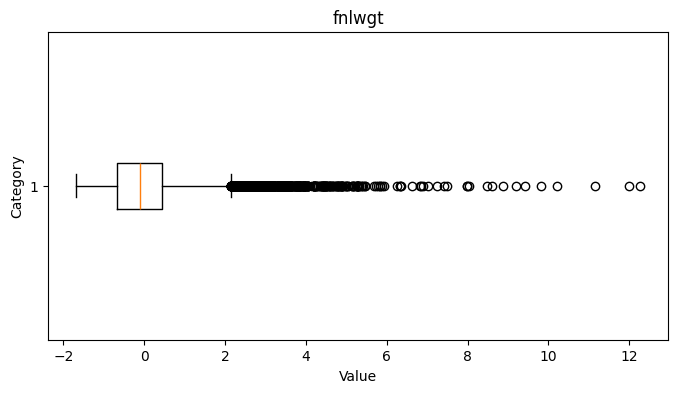

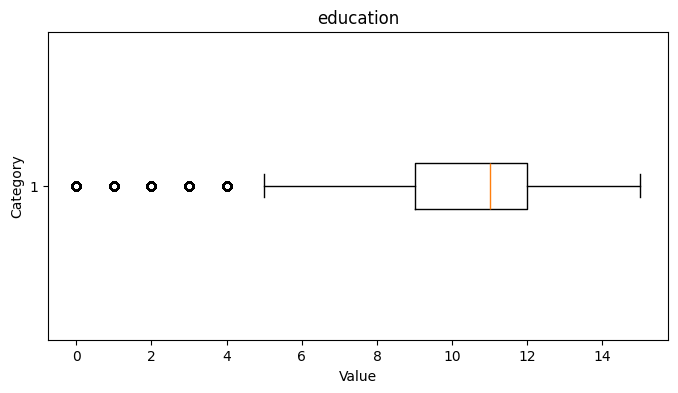

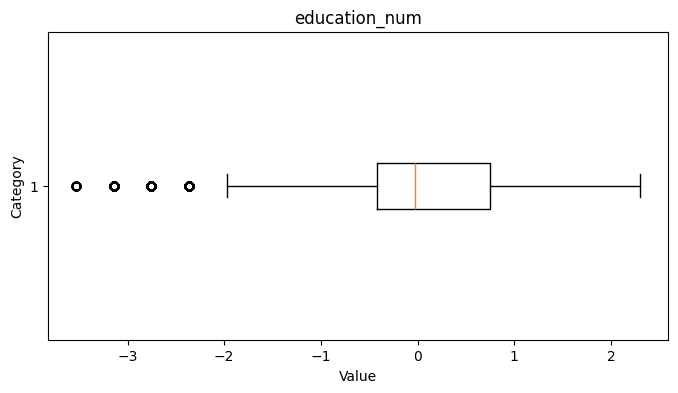

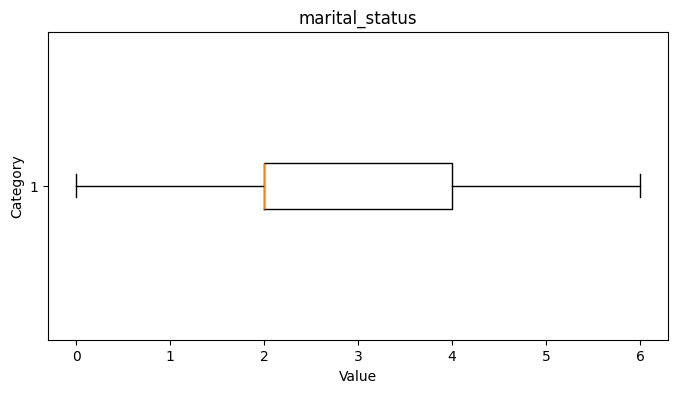

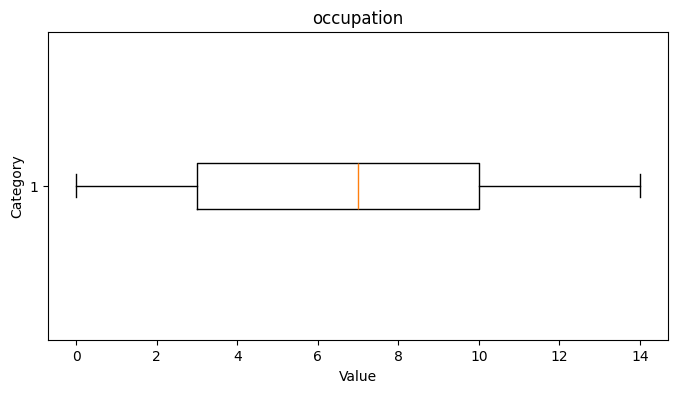

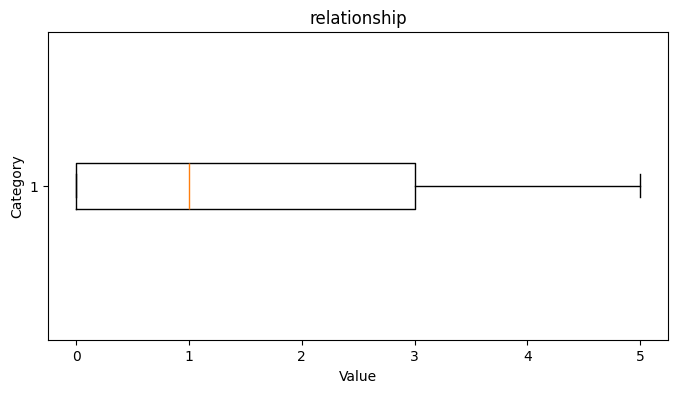

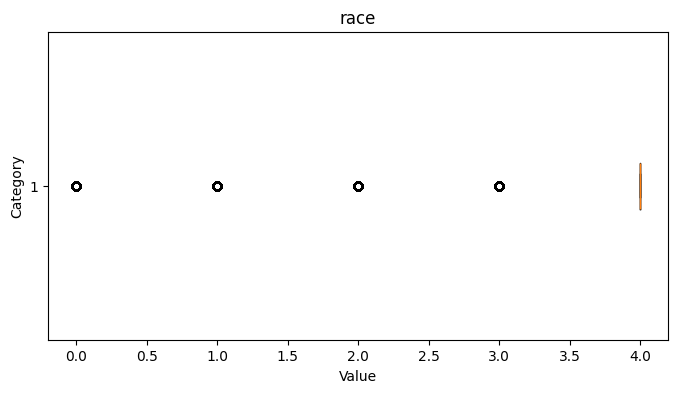

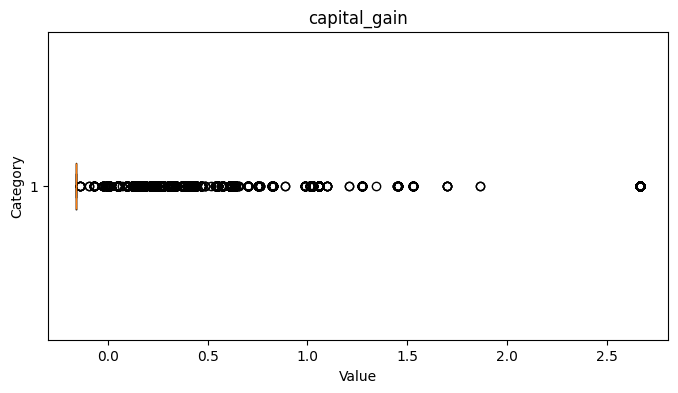

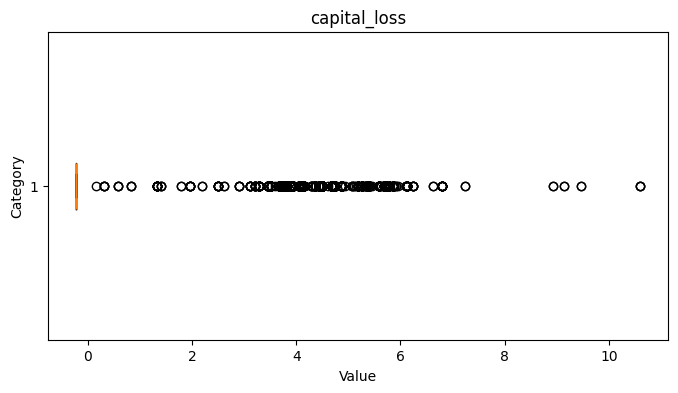

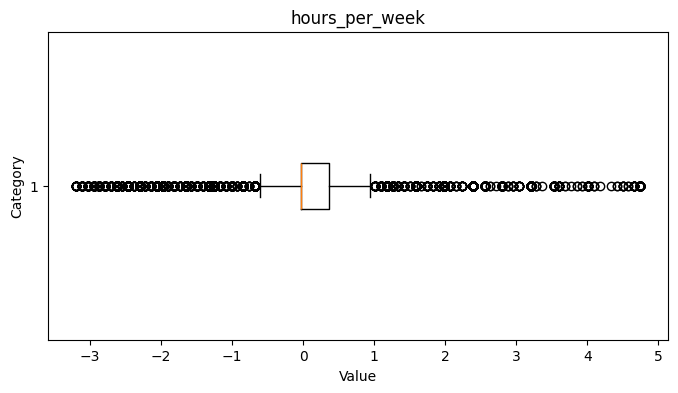

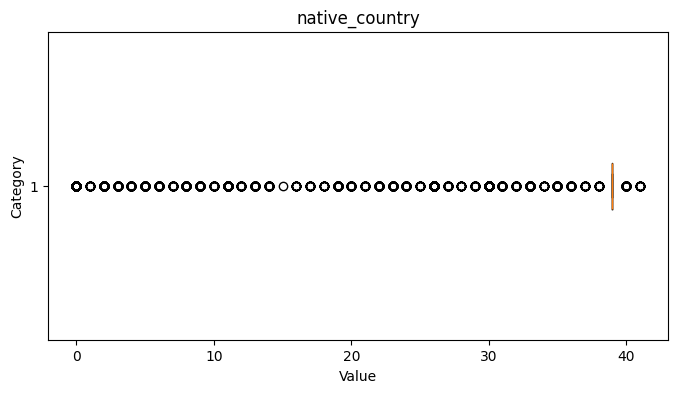

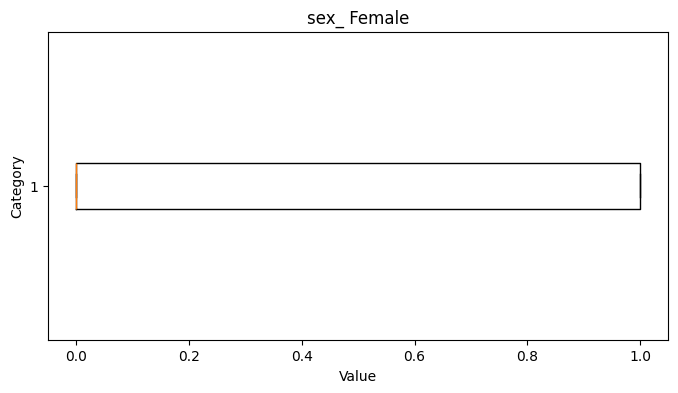

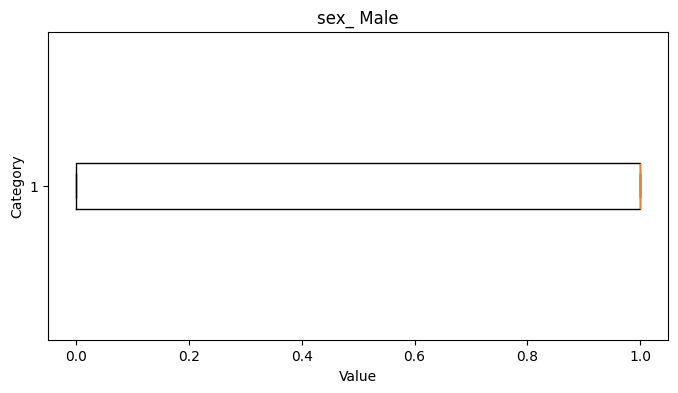

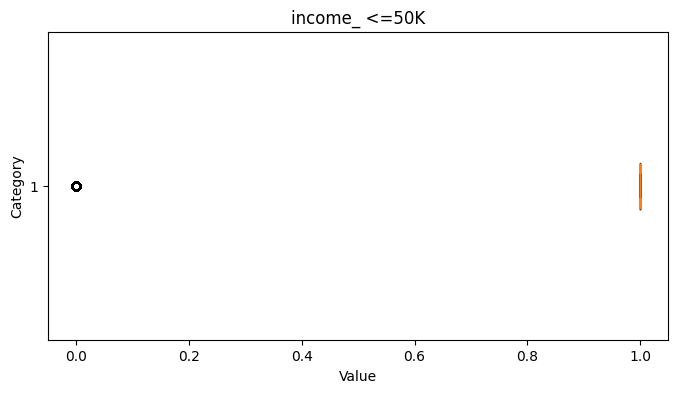

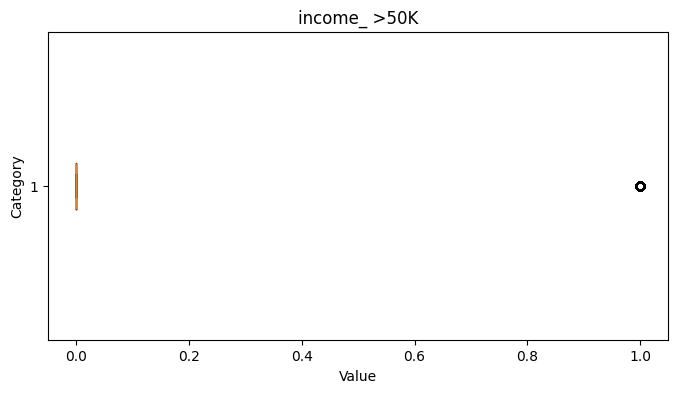

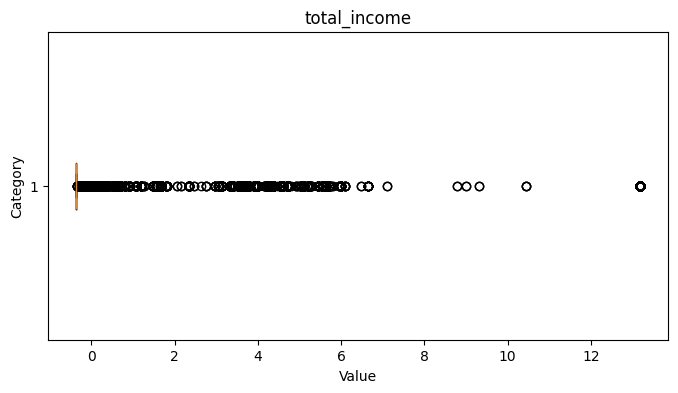

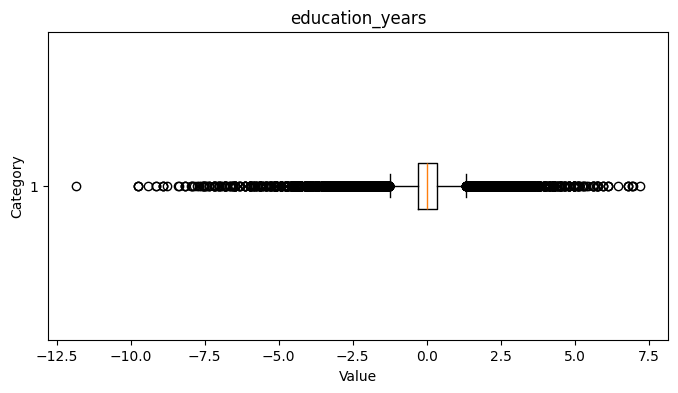

In [13]:
for column in df.columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size for each plot
    plt.boxplot(df[column], vert=False)
    plt.title(column)  # Set title as column name
    plt.xlabel("Value")
    plt.ylabel("Category")
    plt.show()

In [14]:
clf = IsolationForest(random_state=42)
outliers = clf.fit_predict(df.select_dtypes(include=['float64', 'int64']))
df = df[outliers != -1]

#### Isolation Forest algorithm for outlier detection and removal should reduce the presence of outliers in the dataset. However, it's important to note that the effectiveness of outlier removal depends on various factors such as the nature of data, the chosen parameters of the Isolation Forest algorithm, and the threshold for considering points as outliers.

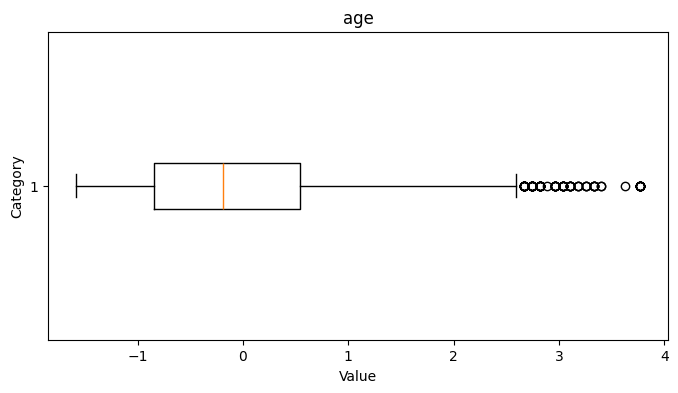

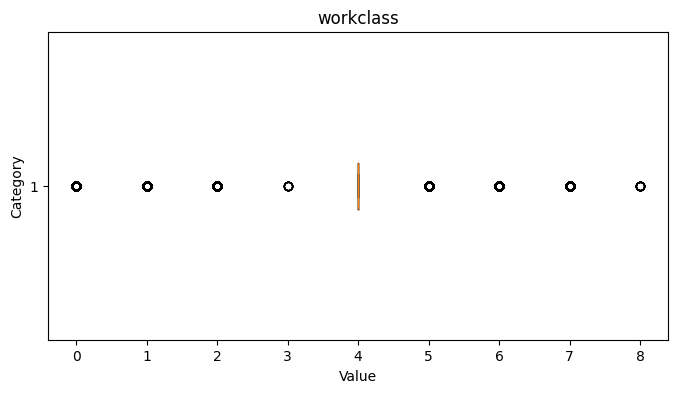

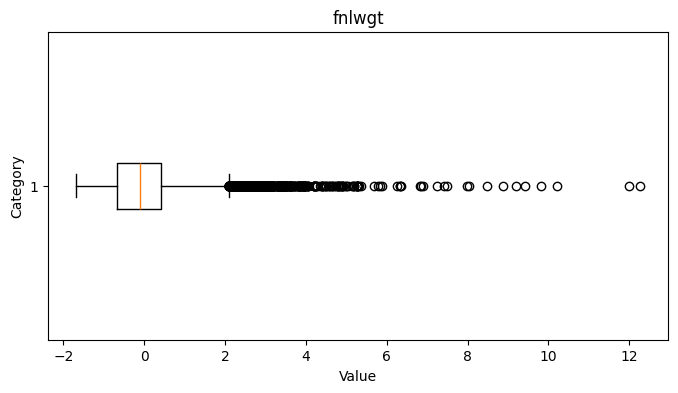

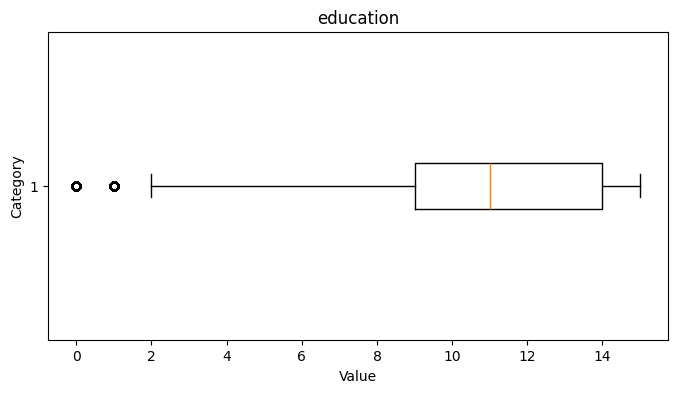

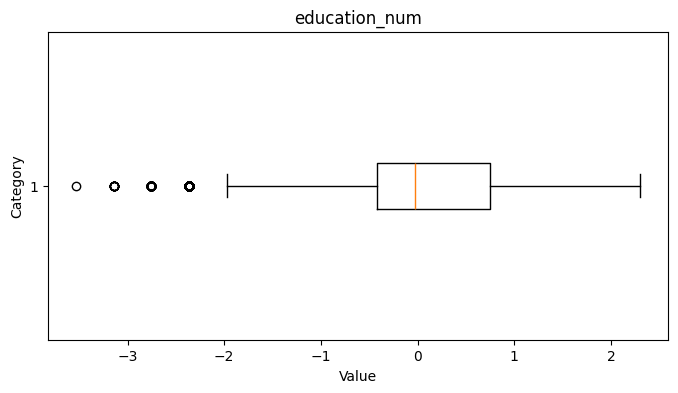

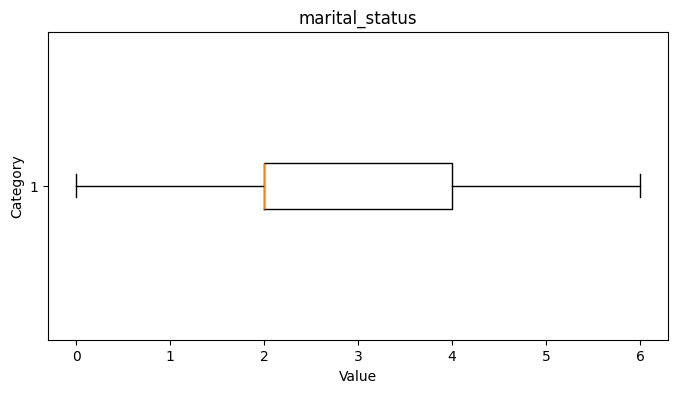

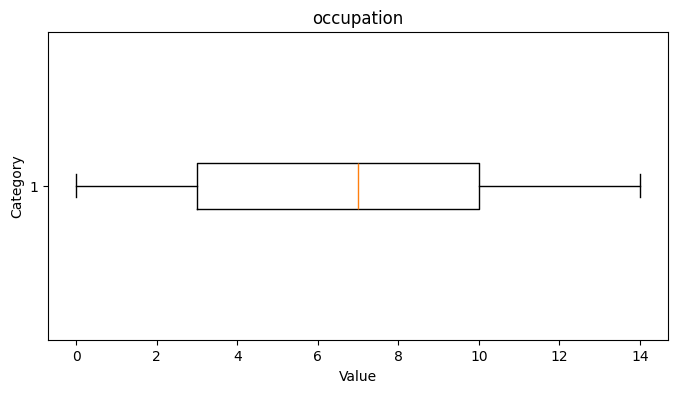

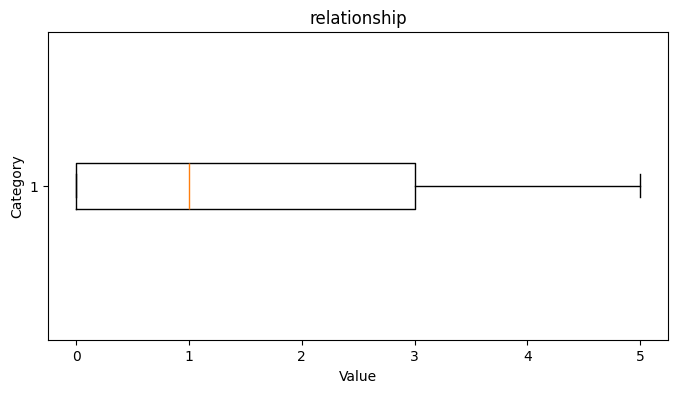

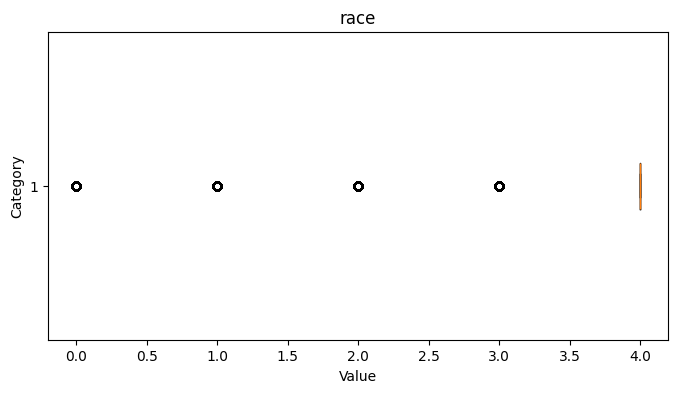

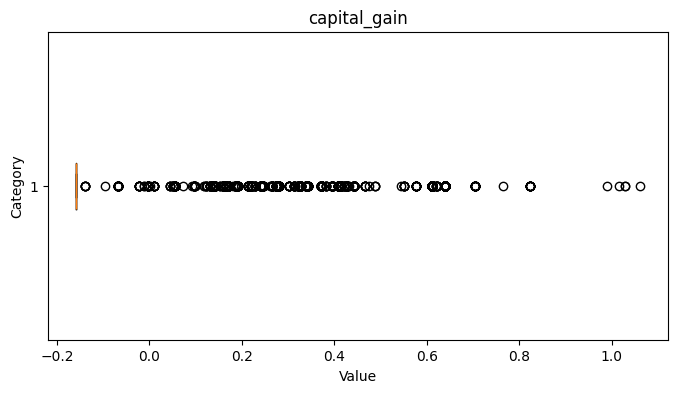

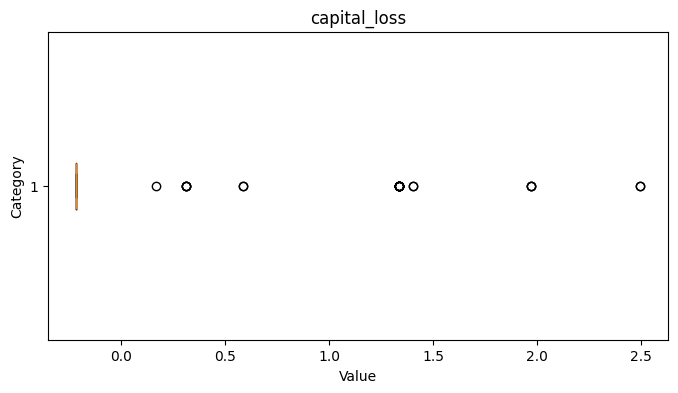

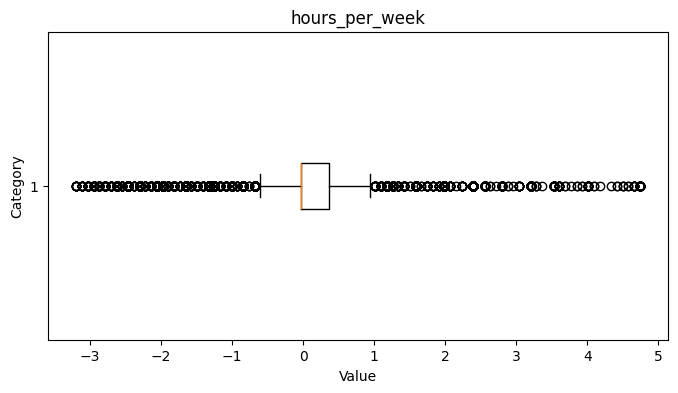

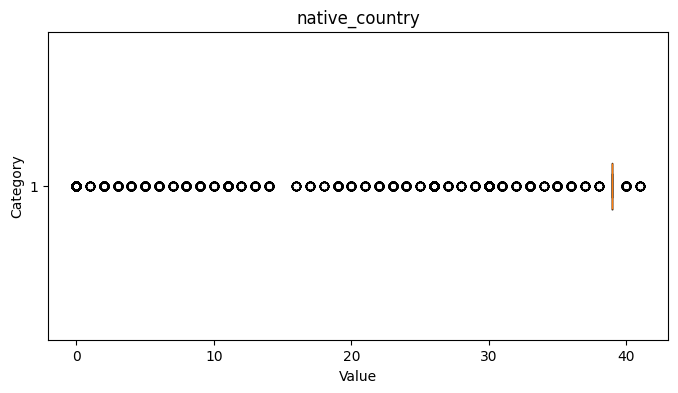

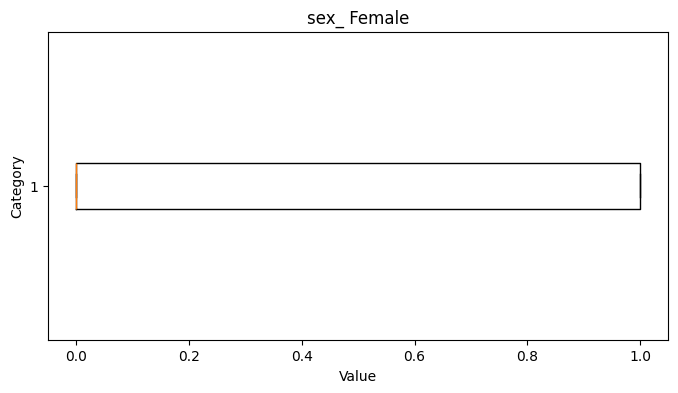

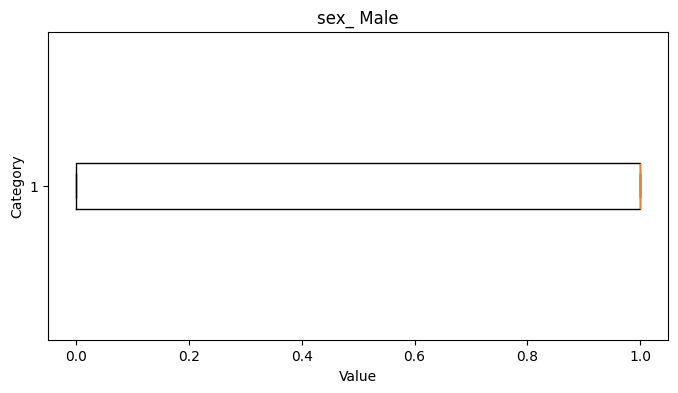

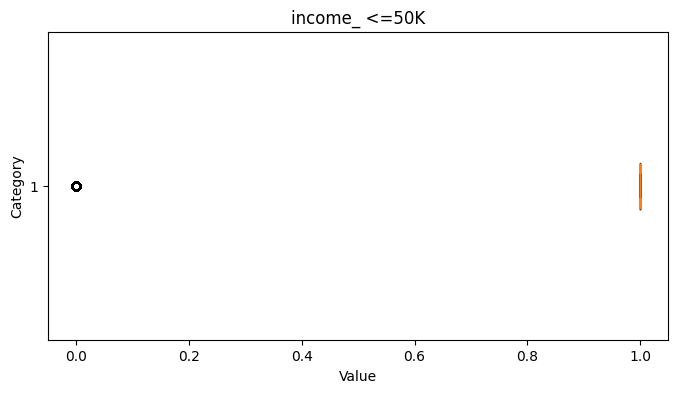

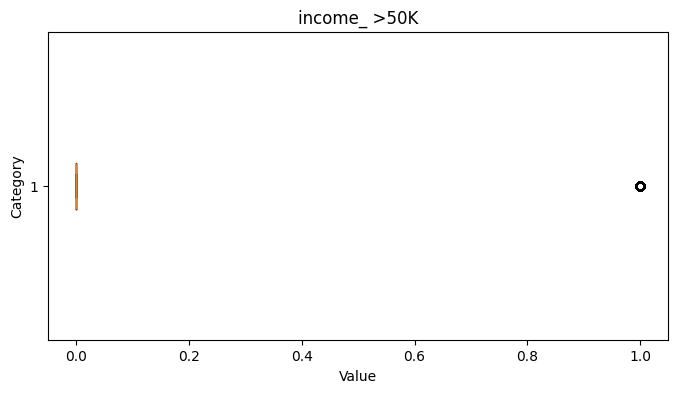

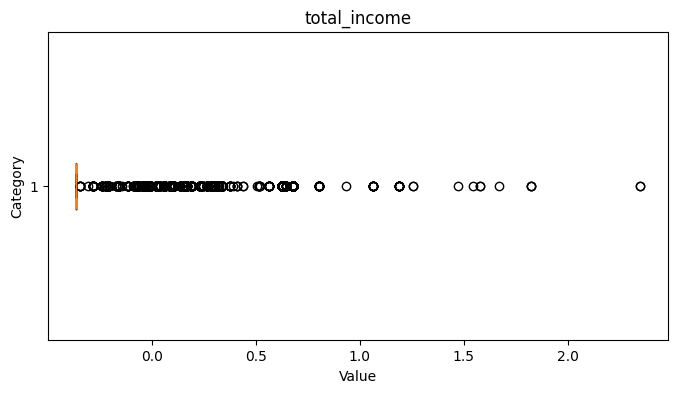

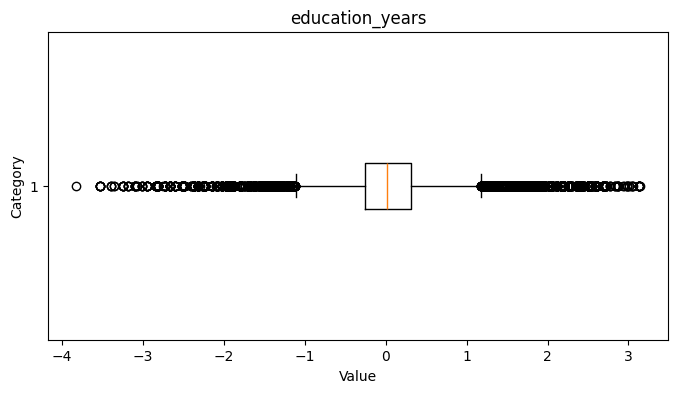

In [15]:
for column in df.columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size for each plot
    plt.boxplot(df[column], vert=False)
    plt.title(column)  # Set title as column name
    plt.xlabel("Value")
    plt.ylabel("Category")
    plt.show()

#### Apply the PPS (Predictive Power Score) to find and discuss the relationships between features:

In [16]:
# PPS (Predictive Power Score) to find relationships between features
pps_matrix = pps.matrix(df)

# Print PPS matrix
print(pps_matrix)

                   x                y  ppscore            case  \
0                age              age      1.0  predict_itself   
1                age        workclass      0.0      regression   
2                age           fnlwgt      0.0      regression   
3                age        education      0.0      regression   
4                age    education_num      0.0      regression   
..               ...              ...      ...             ...   
356  education_years        sex_ Male      0.0      regression   
357  education_years    income_ <=50K      0.0      regression   
358  education_years     income_ >50K      0.0      regression   
359  education_years     total_income      0.0      regression   
360  education_years  education_years      1.0  predict_itself   

     is_valid_score               metric  baseline_score  model_score  \
0              True                 None        0.000000     1.000000   
1              True  mean absolute error        0.749200     

In [17]:
# Exclude self-predictions and PPScores of 1.0
sorted_pps_filtered = pps_matrix[(pps_matrix['x'] != pps_matrix['y']) & (pps_matrix['ppscore'] < 1.0)]

# Sort the filtered PPScore dataframe by descending order of PPScore
sorted_pps_filtered = sorted_pps_filtered.sort_values(by='ppscore', ascending=False)

# Extract the top 10 features
top_10_features_filtered = sorted_pps_filtered.head(10)

# Display the top 10 features excluding self-predictions and PPScores of 1.0
print(top_10_features_filtered)

                   x               y   ppscore        case  is_valid_score  \
61         education   education_num  1.000000  regression            True   
332     total_income    capital_gain  0.981426  regression            True   
188     capital_gain    total_income  0.952768  regression            True   
342  education_years             age  0.941236  regression            True   
345  education_years       education  0.925417  regression            True   
346  education_years   education_num  0.901920  regression            True   
138     relationship  marital_status  0.302326  regression            True   
95    marital_status             age  0.207062  regression            True   
146     relationship     sex_ Female  0.203112  regression            True   
147     relationship       sex_ Male  0.203112  regression            True   

                  metric  baseline_score   model_score  \
61   mean absolute error        0.639644  3.758549e-15   
332  mean absolute error 

## Min-Max Scaling:

In [18]:
df = data.copy()
scaler = MinMaxScaler()
df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])

## Encoding Techniques:
#### Apply One-Hot Encoding to categorical variables with less than 5 categories:

In [19]:
# One-Hot Encoding for categorical variables with less than 5 categories
one_hot_cols = [col for col in df.columns if df[col].nunique() < 5 and df[col].dtype == 'object']
df = pd.get_dummies(df, columns=one_hot_cols)

#### Use Label Encoding for categorical variables with more than 5 categories:

In [20]:
# Label Encoding for categorical variables with more than 5 categories
label_cols = [col for col in df.columns if df[col].nunique() >= 5 and df[col].dtype == 'object']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Feature Engineering:
#### Create at least 2 new features:

In [21]:
# Create new features
df['total_income'] = df['capital_gain'] + df['capital_loss']
df['education_years'] = df['age'] * df['education_num']

#### Apply a transformation (e.g., log transformation) to at least one skewed numerical feature:

In [22]:
# Apply log transformation to skewed numerical feature
df['capital_gain'] = np.log(df['capital_gain'] + 1)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,total_income,education_years
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021507,0.0,0.397959,39,0,1,1,0,0.02174,0.241096
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,0,1,1,0,0.00000,0.361644
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,0,1,1,0,0.00000,0.153425
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,0,1,1,0,0.00000,0.197260
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,1,0,1,0,0.00000,0.120548


# Feature Selection:
#### Use the Isolation Forest algorithm to identify and remove outliers:

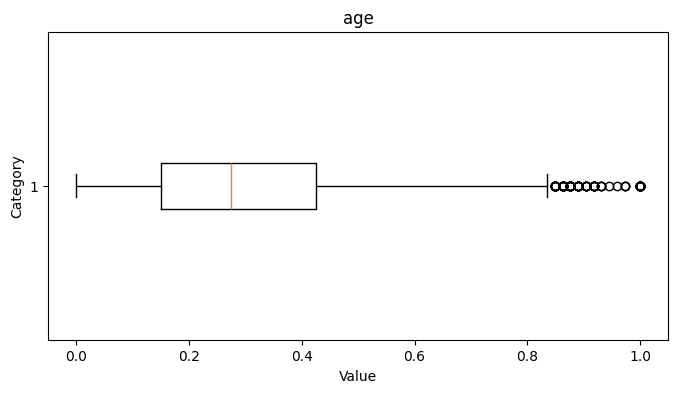

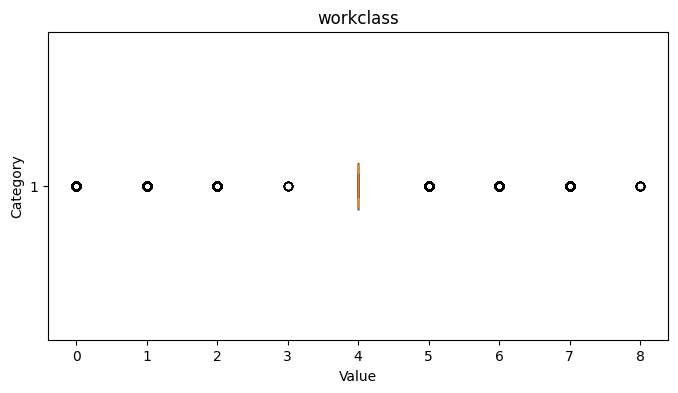

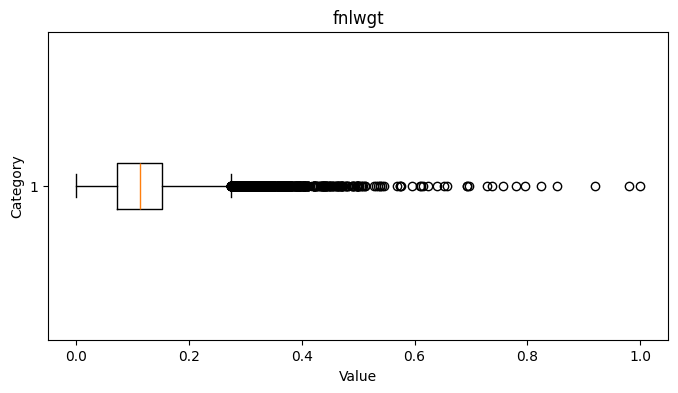

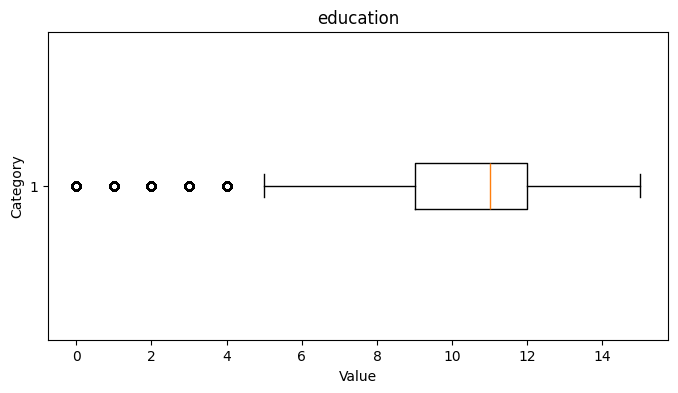

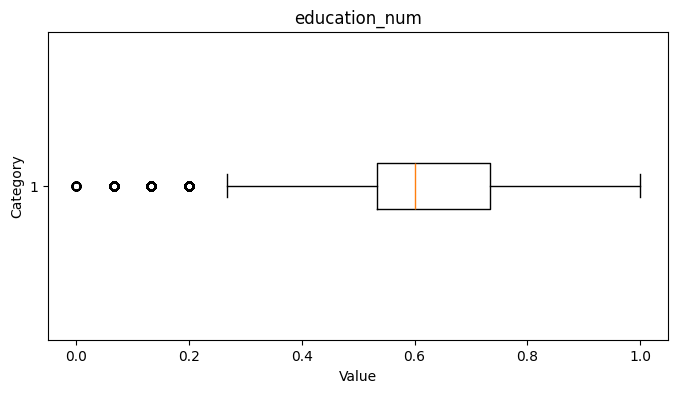

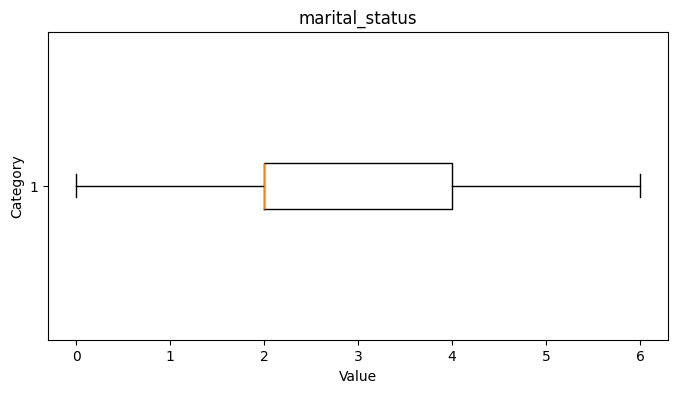

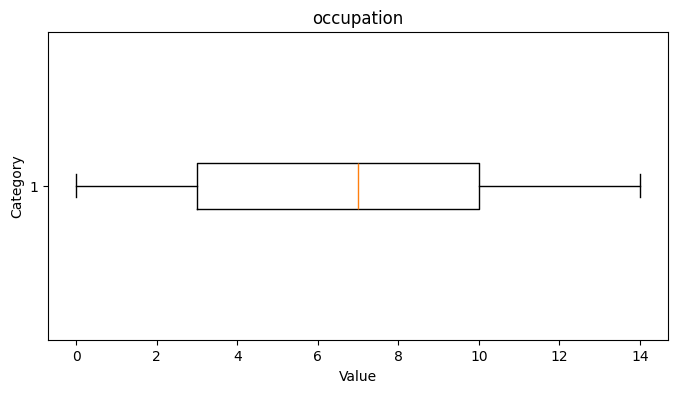

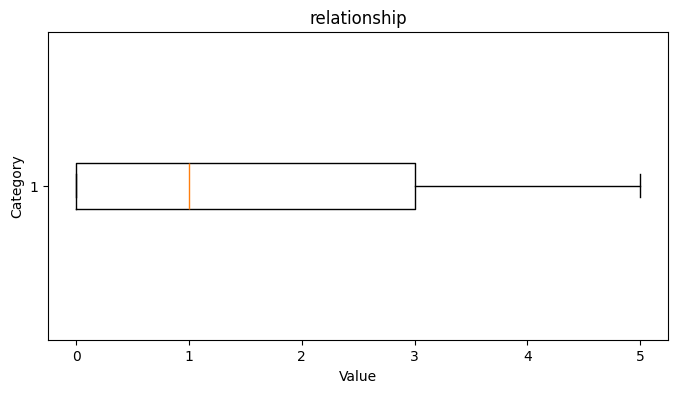

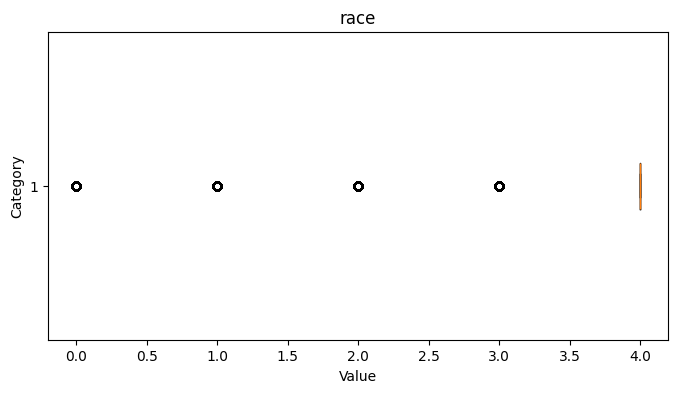

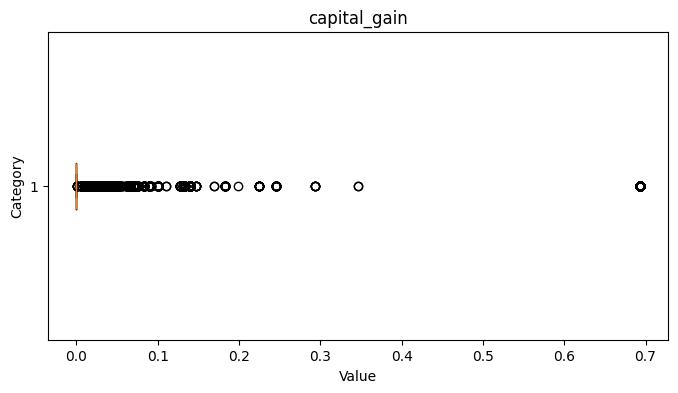

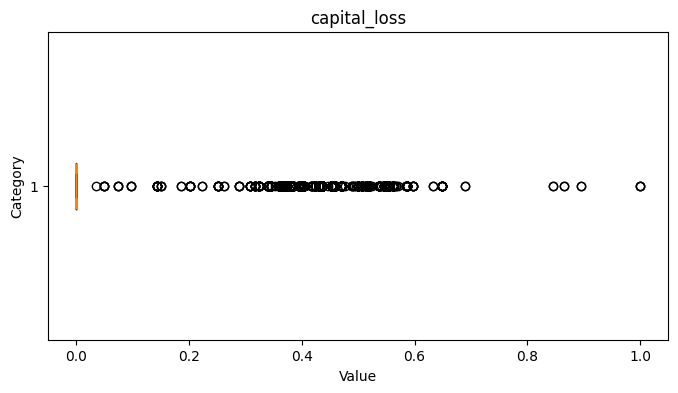

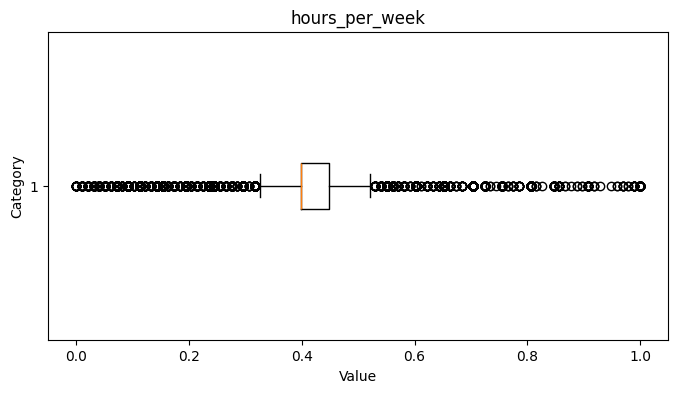

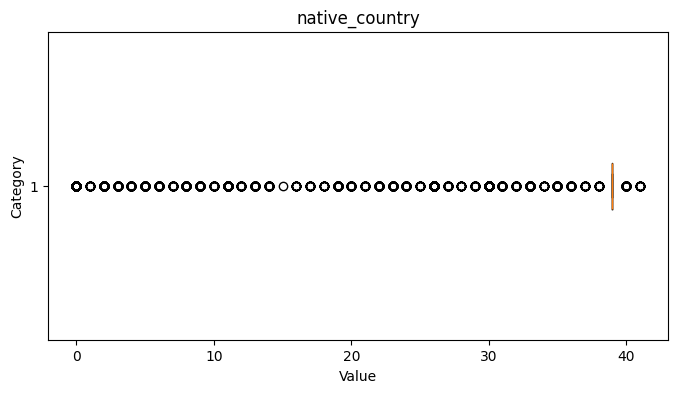

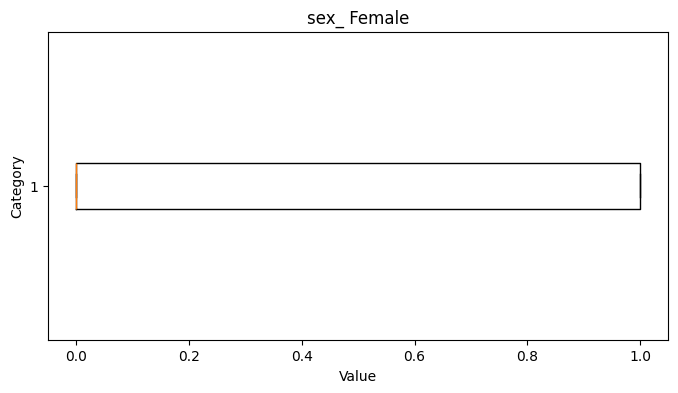

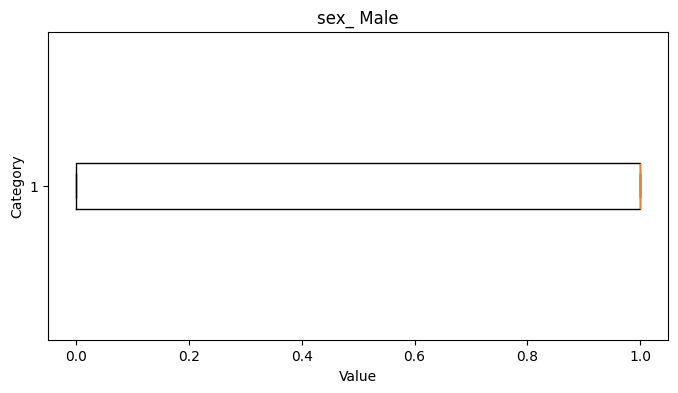

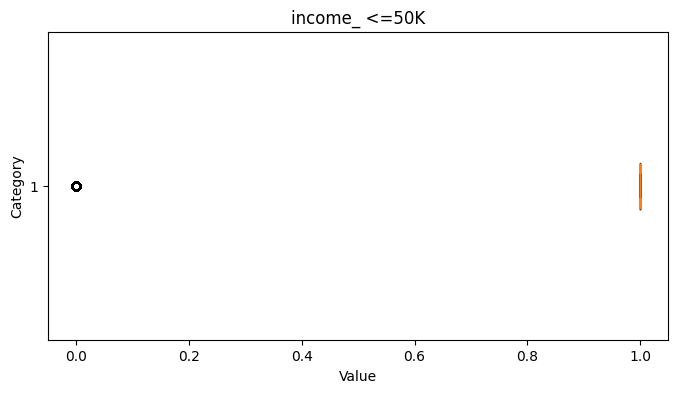

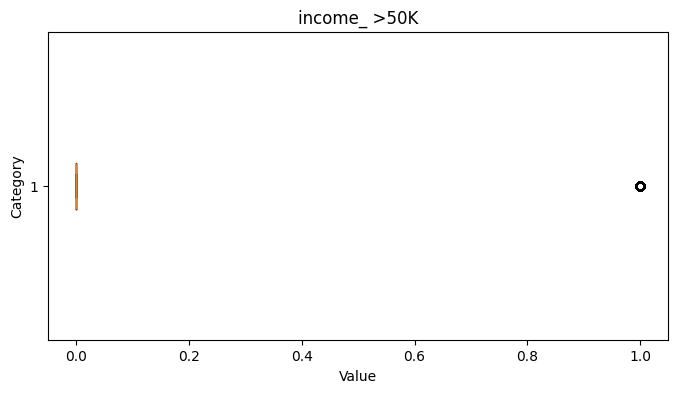

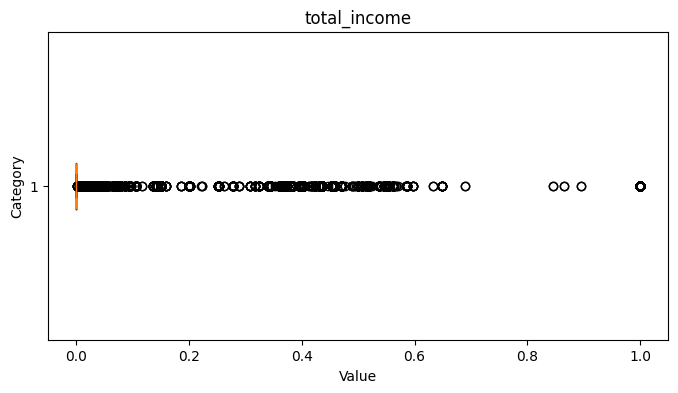

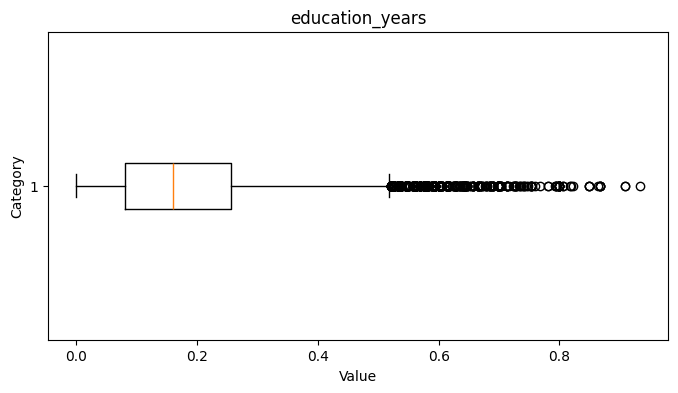

In [23]:
for column in df.columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size for each plot
    plt.boxplot(df[column], vert=False)
    plt.title(column)  # Set title as column name
    plt.xlabel("Value")
    plt.ylabel("Category")
    plt.show()

In [24]:
clf = IsolationForest(random_state=42)
outliers = clf.fit_predict(df.select_dtypes(include=['float64', 'int64']))
df = df[outliers != -1]

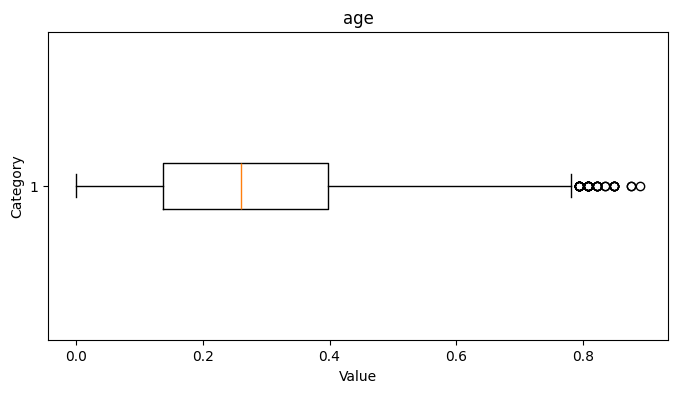

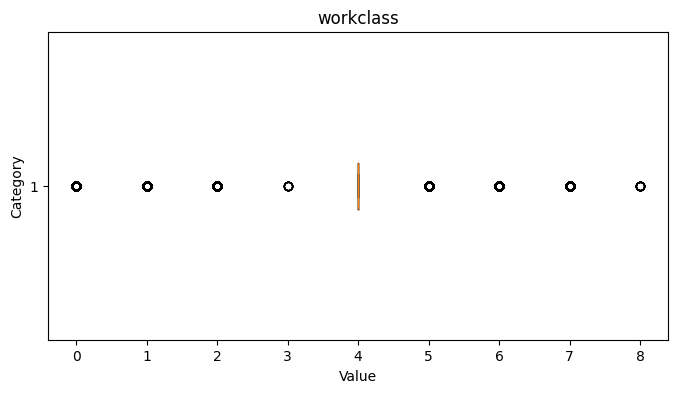

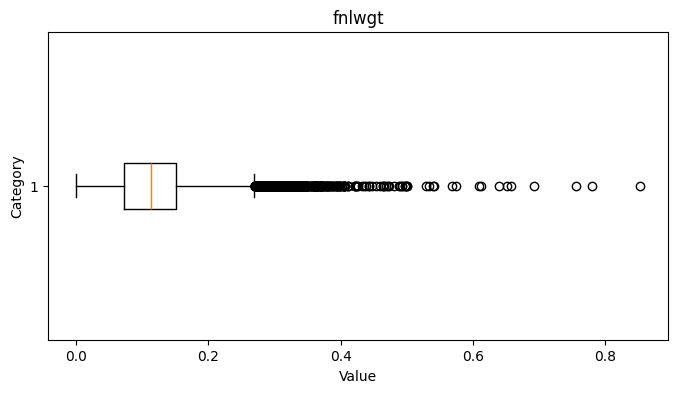

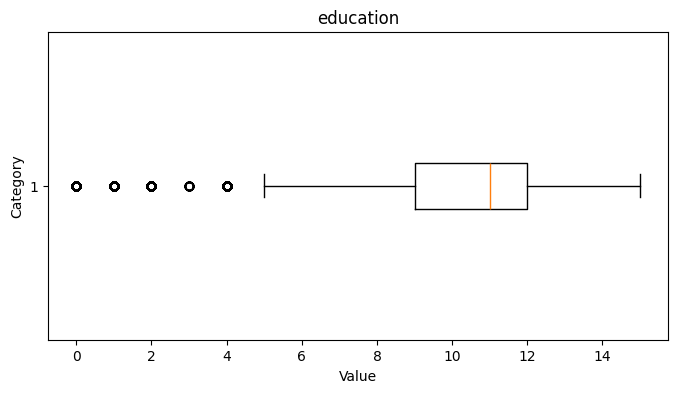

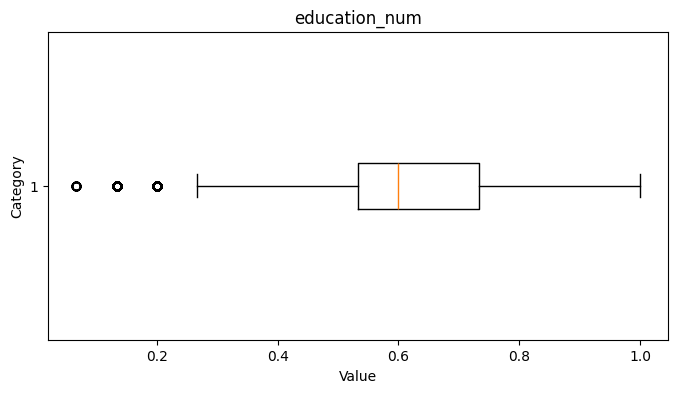

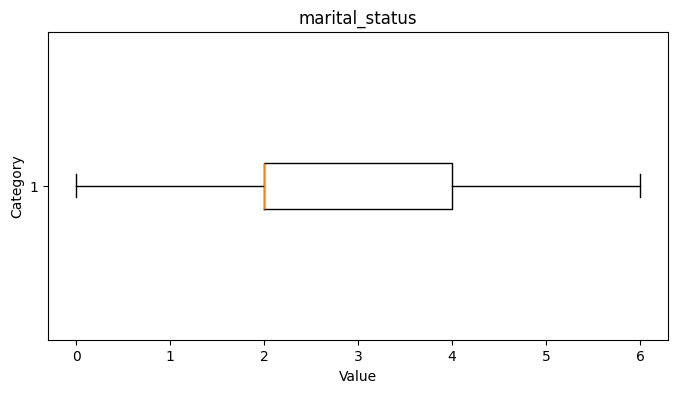

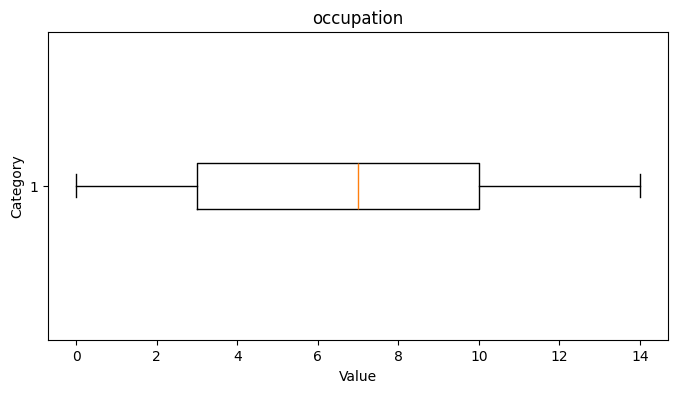

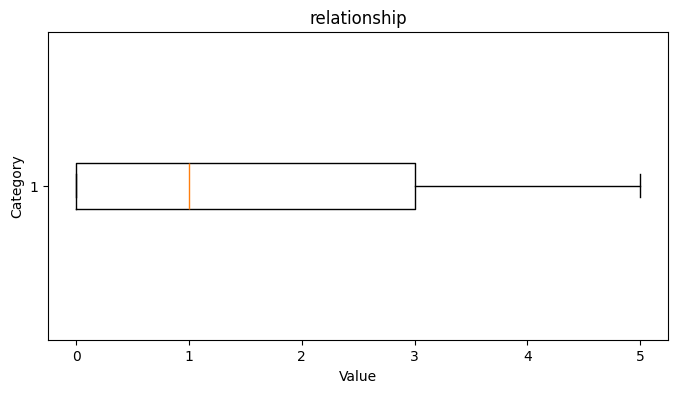

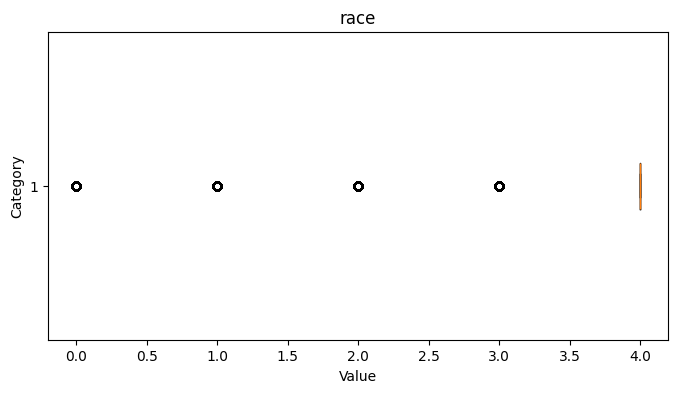

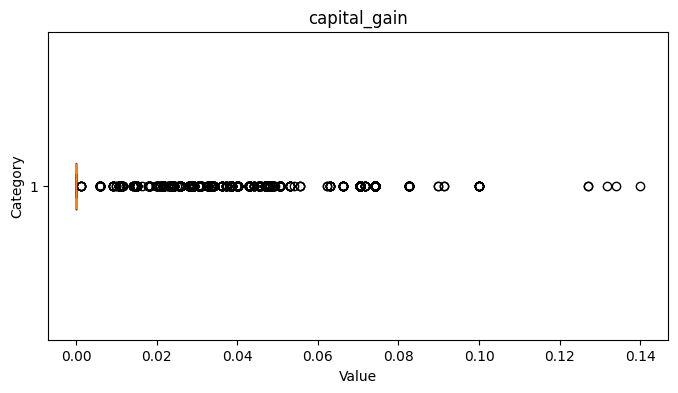

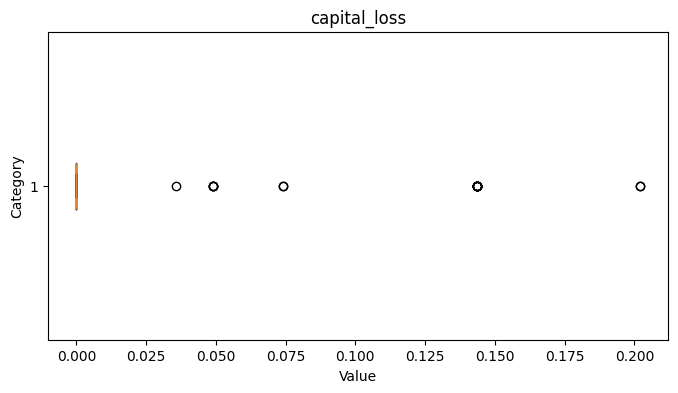

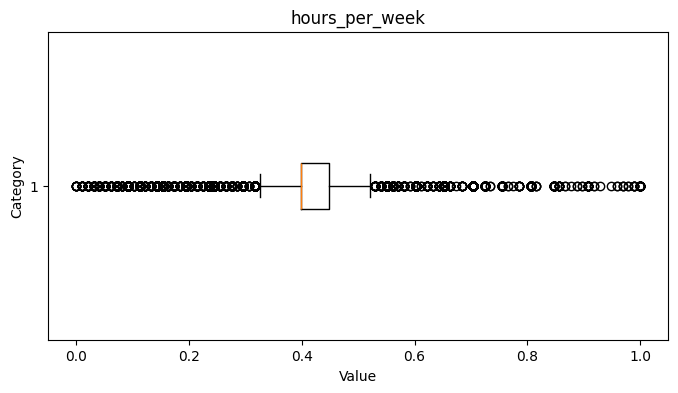

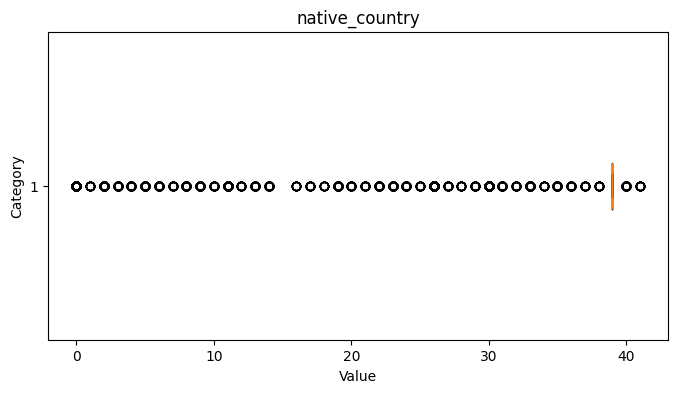

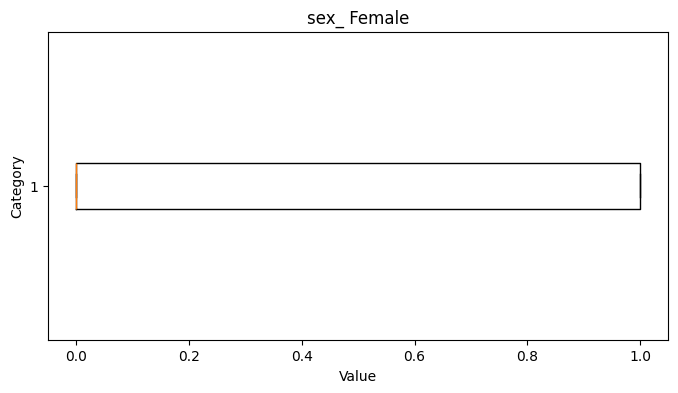

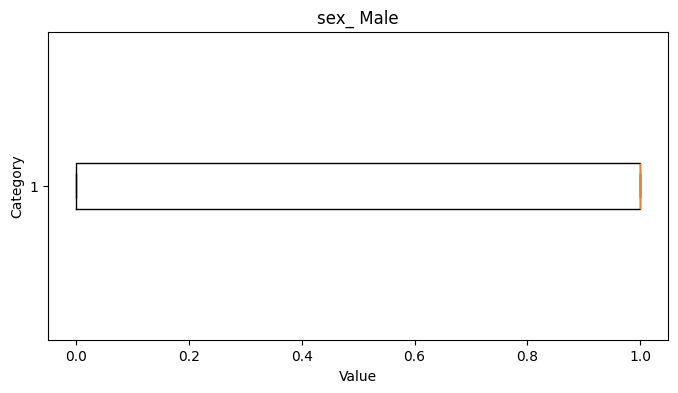

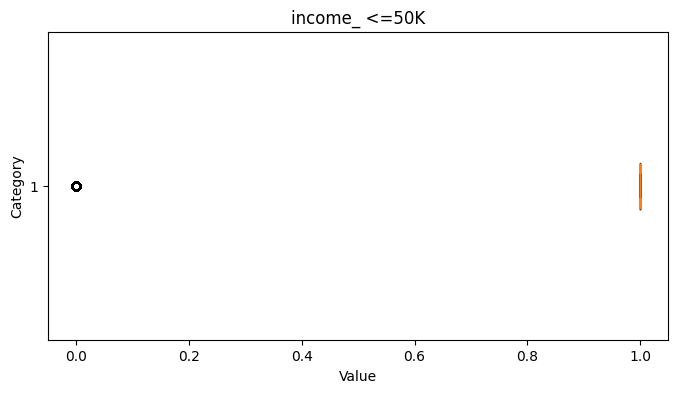

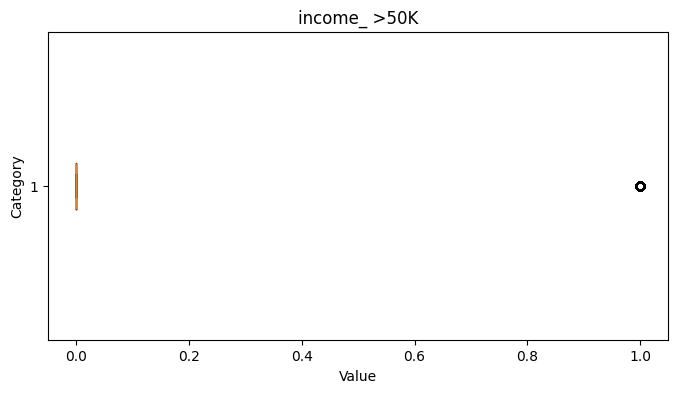

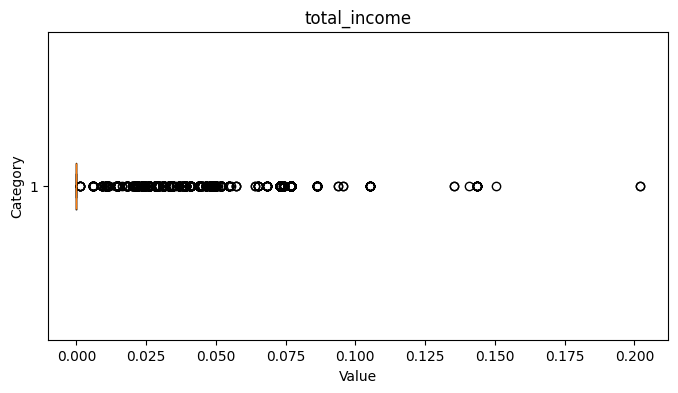

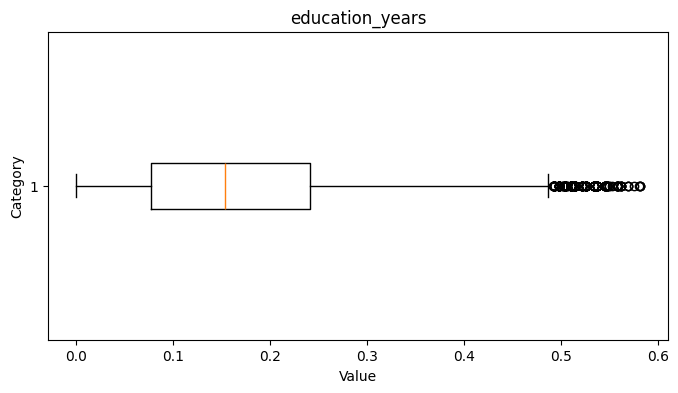

In [25]:
for column in df.columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size for each plot
    plt.boxplot(df[column], vert=False)
    plt.title(column)  # Set title as column name
    plt.xlabel("Value")
    plt.ylabel("Category")
    plt.show()

#### Apply the PPS (Predictive Power Score) to find and discuss the relationships between features:

In [26]:
# PPS (Predictive Power Score) to find relationships between features
pps_matrix = pps.matrix(df)

# Print PPS matrix
print(pps_matrix)

                   x                y  ppscore            case  \
0                age              age      1.0  predict_itself   
1                age        workclass      0.0      regression   
2                age           fnlwgt      0.0      regression   
3                age        education      0.0      regression   
4                age    education_num      0.0      regression   
..               ...              ...      ...             ...   
356  education_years        sex_ Male      0.0      regression   
357  education_years    income_ <=50K      0.0      regression   
358  education_years     income_ >50K      0.0      regression   
359  education_years     total_income      0.0      regression   
360  education_years  education_years      1.0  predict_itself   

     is_valid_score               metric  baseline_score  model_score  \
0              True                 None        0.000000     1.000000   
1              True  mean absolute error        0.710600     

In [27]:
# Exclude self-predictions and PPScores of 1.0
sorted_pps_filtered = pps_matrix[(pps_matrix['x'] != pps_matrix['y']) & (pps_matrix['ppscore'] < 1.0)]

# Sort the filtered PPScore dataframe by descending order of PPScore
sorted_pps_filtered = sorted_pps_filtered.sort_values(by='ppscore', ascending=False)

# Extract the top 10 features
top_10_features_filtered = sorted_pps_filtered.head(10)

# Display the top 10 features excluding self-predictions and PPScores of 1.0
print(top_10_features_filtered)

                   x                y   ppscore        case  is_valid_score  \
61         education    education_num  1.000000  regression            True   
332     total_income     capital_gain  0.964772  regression            True   
188     capital_gain     total_income  0.935202  regression            True   
342  education_years              age  0.720444  regression            True   
18               age  education_years  0.617272  regression            True   
345  education_years        education  0.396577  regression            True   
346  education_years    education_num  0.335920  regression            True   
138     relationship   marital_status  0.300340  regression            True   
147     relationship        sex_ Male  0.255029  regression            True   
146     relationship      sex_ Female  0.255029  regression            True   

                  metric  baseline_score   model_score  \
61   mean absolute error        0.115467  4.422296e-15   
332  mean abso

# Conclusion:
#### 'Total_income' and 'capital_gain' have high predictive power with each other, with PPScores of 0.964772 and 0.935202, respectively. This suggests a strong relationship between total income and capital gains, which is reasonable as they are both related to financial aspects.

#### 'Education_years' and 'age' also show a significant predictive power relationship with a PPScore of 0.720444. This indicates that the number of education years might be predictive of a person's age, which is plausible as individuals tend to spend more years in education as they age.

#### 'Relationship' has a moderate predictive power relationship with 'marital_status' with a PPScore of 0.300340. This suggests that there may be a relationship between relationship status and marital status.

#### Additionally, 'relationship' has predictive power relationships with 'sex_male' and 'sex_female', both with a PPScore of 0.255029. This indicates that there may be gender differences in relationship status.